In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

#Read in the data
df=pd.read_csv(r'C:\Users\Payin\Downloads\movies.csv\movies.csv')


In [2]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [3]:
df.isnull().tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False
7667,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False


In [4]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
df[df.budget.isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


In [6]:
df.shape

(7668, 15)

In [7]:
df['rating'].value_counts(dropna=False)

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
NaN            77
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [8]:
# filling all missing values in rating column to 'Not rated'

df['rating'].fillna(value='Not Rated', inplace=True)

In [9]:
# Rechecking for missing values in rating column after filling with Not Rated

df['rating'].value_counts(dropna=False)

R            3697
PG-13        2112
PG           1252
Not Rated     360
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [10]:
df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [11]:
# checking for missing values in released column

df['released'].value_counts(dropna=False)

February 14, 1986 (United States)     9
October 4, 1991 (United States)       9
May 17, 2019 (United States)          9
October 21, 1988 (United States)      8
March 9, 1990 (United States)         8
                                     ..
April 6, 1983 (France)                1
October 13, 2000 (United Kingdom)     1
September 29, 1984 (United States)    1
October 10, 2012 (France)             1
January 14, 2015 (Belgium)            1
Name: released, Length: 3415, dtype: int64

In [12]:
# filling all missing values in released column with 'March 9, 1990 (United States)

df['released'].fillna(value='March 9, 1990 (United States)', inplace=True)

In [13]:
# Rechecking for missing values in released column after filling 

df['released'].value_counts(dropna=False)

March 9, 1990 (United States)        10
May 17, 2019 (United States)          9
October 4, 1991 (United States)       9
February 14, 1986 (United States)     9
October 21, 1988 (United States)      8
                                     ..
October 17, 2003 (United Kingdom)     1
September 20, 2018 (Lebanon)          1
July 1, 1998 (United States)          1
August 31, 1984 (West Germany)        1
November 16, 1988 (France)            1
Name: released, Length: 3414, dtype: int64

In [14]:
#Rechecking all columns

df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [15]:
# checking for missing values in score column

df['score'].value_counts(dropna=False)

6.6    359
6.4    351
6.2    346
6.7    332
6.5    331
      ... 
2.4      2
2.3      1
9.3      1
2.6      1
9.0      1
Name: score, Length: 73, dtype: int64

In [16]:
# Filling missing values in scores column with mode (highest frequency - 6.6)

df['score'].fillna(value=6.6, inplace=True)

In [17]:
# Rechecking all columns to verify that scores has no missing values

df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [18]:
# checking for missing values in votes column

df['votes'].value_counts(dropna=False)

13000.0     117
11000.0     116
14000.0     105
15000.0     102
19000.0     102
           ... 
681.0         1
810000.0      1
545.0         1
376000.0      1
897000.0      1
Name: votes, Length: 937, dtype: int64

In [19]:
#Filling missing values in votes column with mode (highest frequency - 13000.0)

df['votes'].fillna(value=13000.0, inplace=True)

In [20]:
# Rechecking all columns to verify that votes has no missing values

df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [21]:
# checking for missing values in writer column

df['writer'].value_counts(dropna=False)

Woody Allen           37
Stephen King          31
Luc Besson            26
John Hughes           25
David Mamet           15
                      ..
Dori Pierson           1
Miranda July           1
Sabrina Dhawan         1
Shelly Chopra Dhar     1
Laura Hillenbrand      1
Name: writer, Length: 4536, dtype: int64

In [22]:
#Filling missing values in writer column to unknown

df['writer'].fillna(value='Unknown', inplace=True)

In [23]:
# Rechecking all columns to verify that votes has no missing values

df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [24]:
# checking for missing values in star column

df['star'].value_counts(dropna=False)

Nicolas Cage              43
Tom Hanks                 41
Robert De Niro            41
Denzel Washington         37
Tom Cruise                34
                          ..
Fernanda Andrade           1
Louis Ashbourne Serkis     1
Ka-Yan Leung               1
Kevin Anderson             1
Norma Aleandro             1
Name: star, Length: 2815, dtype: int64

In [25]:
#Filling missing values in star column to 'Not Stated'

df['star'].fillna(value='Not stated', inplace=True)

In [26]:
# Rechecking all columns to verify that star has no missing values

df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [27]:
# #Filling missing values in country column to 'Not Specified'

df['country'].fillna(value='Not Specified', inplace=True)

In [28]:
# Rechecking all columns to verify that country has no missing values

df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [29]:
# checking for missing values in budget column

df['budget'].value_counts(dropna=False)

NaN            2171
20000000.0      233
30000000.0      229
25000000.0      211
10000000.0      208
               ... 
7900000.0         1
650000.0          1
209000000.0       1
420000.0          1
17080000.0        1
Name: budget, Length: 414, dtype: int64

In [30]:
#Filling missing values in budget column with mode (highest freq)

df['budget'].median()

#df[budget].fillna(value=20000000.0,inplace=True)

20500000.0

<AxesSubplot:>

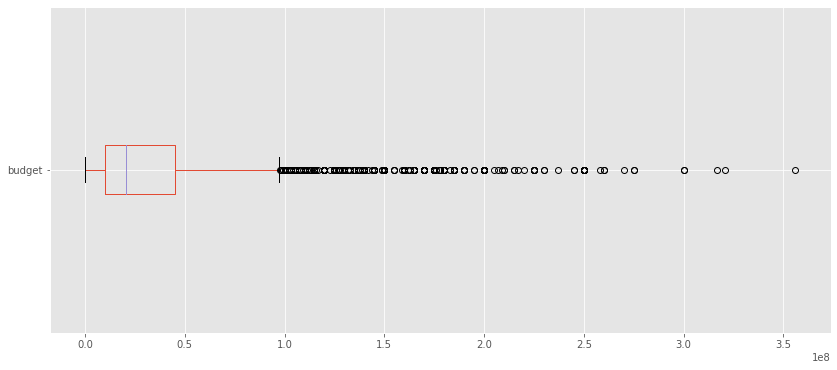

In [31]:
# Box plot to check skew level of budget column

df['budget'].plot(kind= 'box', vert=False, figsize=(14,6))

In [32]:
# Replacing budget missing values with median since the data is right skewed with outliers so mean will not be appriopriate

df['budget'].fillna(df['budget'].median(), inplace=True)

In [33]:
df.isnull().sum()

name          0
rating        0
genre         0
year          0
released      0
score         0
votes         0
director      0
writer        0
star          0
country       0
budget        0
gross       189
company      17
runtime       4
dtype: int64

In [34]:
# checking missing values in gross

df['gross'].value_counts(dropna=False)

NaN           189
14000000.0      3
10000000.0      2
5073.0          2
12000000.0      2
             ... 
49998613.0      1
130974.0        1
84460846.0      1
19875740.0      1
41633384.0      1
Name: gross, Length: 7473, dtype: int64

In [35]:
df['gross'].mean()

78500541.01778312

In [36]:
df['gross'].median()

20205757.0

<AxesSubplot:>

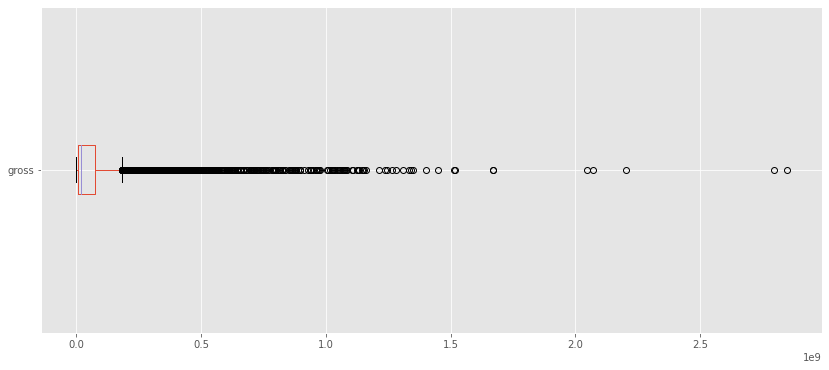

In [37]:
# Box plot to check skew level of gross column

df['gross'].plot(kind='box', vert=False, figsize=(14,6))

In [38]:
# Replacing gross missing values with median since the data is right skewed with outliers so mean will not be appriopriate

df['gross'].fillna(df['gross'].median(),inplace=True)

In [39]:
# Rechecking all columns to verify that country has no missing values

df.isnull().sum()

name         0
rating       0
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [40]:
# checking missing values in company column

df['company'].value_counts(dropna=False)

Universal Pictures               377
Warner Bros.                     334
Columbia Pictures                332
Paramount Pictures               320
Twentieth Century Fox            240
                                ... 
Callender Company                  1
Filmtre                            1
Cort/Madden Productions            1
RAI Radiotelevisione Italiana      1
Cineritino S.r.L.                  1
Name: company, Length: 2386, dtype: int64

In [41]:
# Replacing missing values with mode (highest Frequency)

df['company'].fillna(value='Universal Pictures', inplace=True)

In [42]:
# Rechecking all columns

df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     4
dtype: int64

In [43]:
# Checking for value count for runtime

df['runtime'].value_counts(dropna=False)

97.0     240
90.0     226
98.0     222
100.0    220
96.0     215
        ... 
357.0      1
242.0      1
55.0       1
63.0       1
176.0      1
Name: runtime, Length: 139, dtype: int64

In [44]:
df['runtime'].median()

104.0

In [45]:
df['runtime'].mean()

107.2616127348643

<AxesSubplot:>

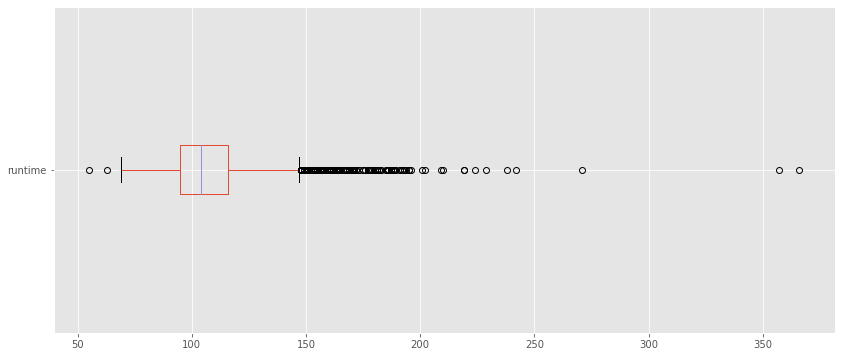

In [46]:
#Use box plot to check for skew level

df['runtime'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

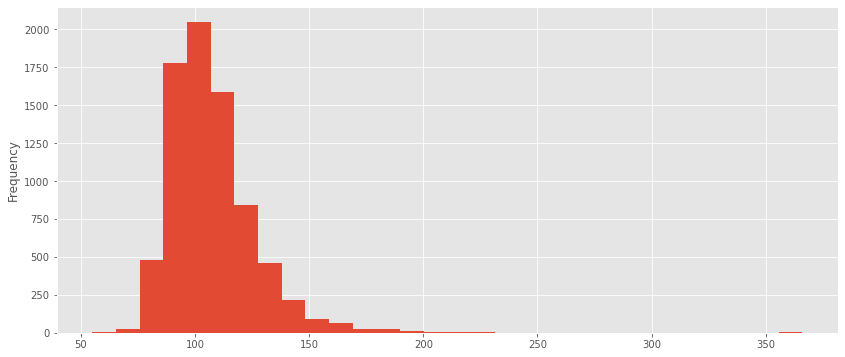

In [47]:
df['runtime'].plot(kind='hist', bins=30, figsize=(14,6))

In [48]:
# Replacing missing values in runtime with median

df['runtime'].fillna(df['runtime'].median(), inplace=True)

In [49]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [50]:
#Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [51]:
#data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [52]:
#Changing datatypes of columns budget and gross

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [53]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,Universal Pictures,90.0
7664,Dream Round,Not Rated,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000,20205757,Cactus Blue Entertainment,90.0
7665,Saving Mbango,Not Rated,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20205757,Embi Productions,104.0
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",6.6,13000.0,James Randall,James Randall,Christina Roz,United States,15000,20205757,Universal Pictures,120.0


In [54]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,Not Rated,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0
2417,Madadayo,Not Rated,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [58]:
# Drop any duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,Universal Pictures,90.0
7664,Dream Round,Not Rated,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000,20205757,Cactus Blue Entertainment,90.0
7665,Saving Mbango,Not Rated,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20205757,Embi Productions,104.0
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",6.6,13000.0,James Randall,James Randall,Christina Roz,United States,15000,20205757,Universal Pictures,120.0


In [59]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,Universal Pictures,90.0
7664,Dream Round,Not Rated,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000,20205757,Cactus Blue Entertainment,90.0
7665,Saving Mbango,Not Rated,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20205757,Embi Productions,104.0
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",6.6,13000.0,James Randall,James Randall,Christina Roz,United States,15000,20205757,Universal Pictures,120.0


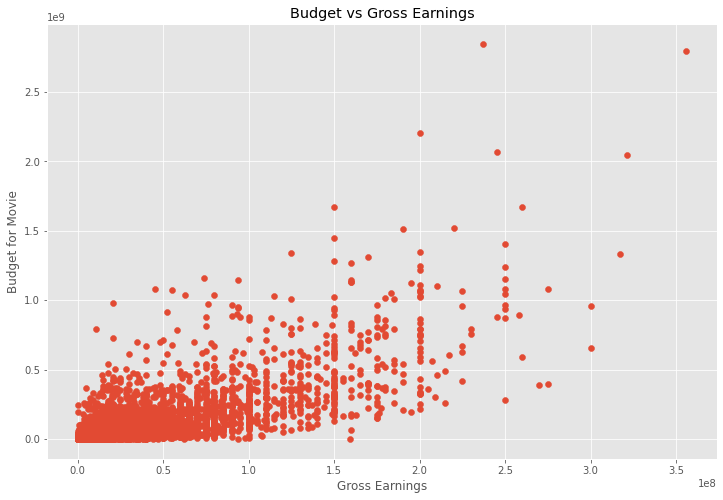

In [63]:
# scatter plot of budget vs gross


plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Movie')

plt.show()


In [61]:
 df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [62]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

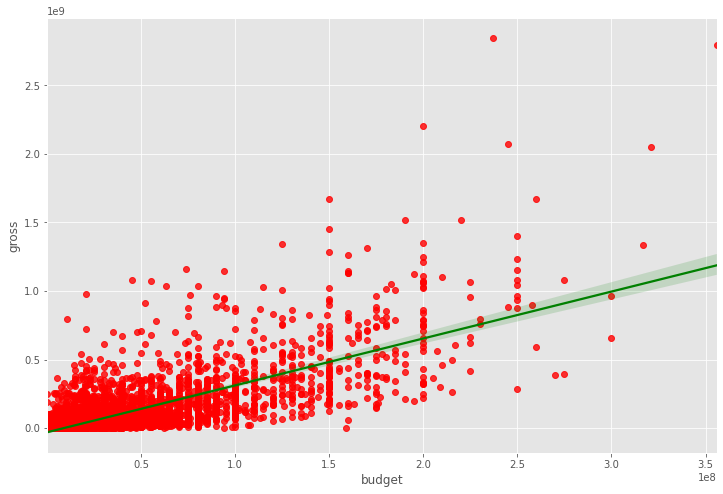

In [67]:
# Plot bydget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'green'})

In [68]:
# Taking a deep dive into correlation


In [73]:
# correlation methods pearson,kendall, spearman

df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.098084,0.222485,0.291690,0.259504,0.120662
score,0.098084,1.000000,0.409123,0.061896,0.185548,0.399411
votes,0.222485,0.409123,1.000000,0.461001,0.632124,0.309137
budget,0.291690,0.061896,0.461001,1.000000,0.745881,0.273371
gross,0.259504,0.185548,0.632124,0.745881,1.000000,0.244380
runtime,0.120662,0.399411,0.309137,0.273371,0.244380,1.000000


In [74]:
# There is high correlation between budget and gross

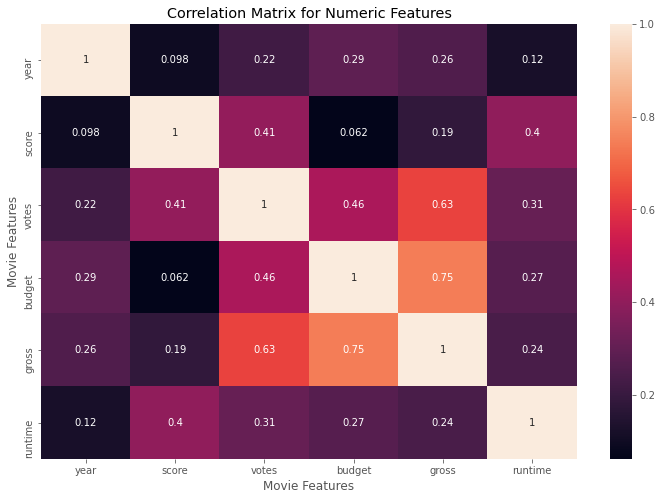

In [78]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [79]:
# Company 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [80]:
# convert all non-numerals (object datatype columns to category datatype)

df_convert2Nums = df

for col in df_convert2Nums.columns:
    if(df_convert2Nums[col].dtype=='object'):
        df_convert2Nums[col]=df_convert2Nums[col].astype('category')
        df_convert2Nums[col]=df_convert2Nums[col].cat.codes
        
df_convert2Nums

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2335,56,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2242,56,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,56,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,56,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2242,56,321000000,2048359754,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1119,6.5,5200.0,730,1123,2320,55,20500000,1400,477,103.0
7625,6720,3,4,2019,1149,5.7,320.0,2546,2565,1915,56,20500000,790,2308,104.0
7580,4664,3,5,2019,1835,5.2,735.0,1445,2203,2279,56,20500000,682,1992,93.0
2417,3406,3,6,1993,85,7.3,5100.0,33,1718,2564,27,11900000,596,796,134.0


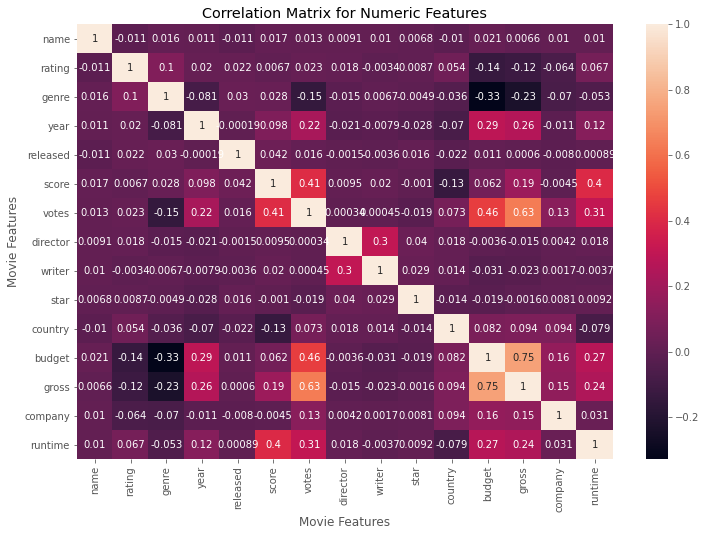

In [81]:
correlation_matrix = df_convert2Nums.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [82]:
df_convert2Nums.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.010860,0.016355,0.011453,-0.010776,0.017114,0.013045,0.009079,0.009985,0.006751,-0.010468,0.020921,0.006601,0.010369,0.010335
rating,-0.010860,1.000000,0.104108,0.019913,0.021568,0.006739,0.022994,0.018466,-0.003401,0.008676,0.053707,-0.135609,-0.119913,-0.064215,0.067191
genre,0.016355,0.104108,1.000000,-0.081261,0.030226,0.027970,-0.145294,-0.015258,0.006747,-0.004857,-0.036374,-0.328484,-0.233385,-0.070013,-0.052719
year,0.011453,0.019913,-0.081261,1.000000,-0.000194,0.098084,0.222485,-0.020795,-0.007930,-0.027751,-0.069930,0.291690,0.259504,-0.011438,0.120662
released,-0.010776,0.021568,0.030226,-0.000194,1.000000,0.042465,0.015953,-0.001510,-0.003575,0.015561,-0.022011,0.010947,0.000604,-0.008036,0.000888
score,0.017114,0.006739,0.027970,0.098084,0.042465,1.000000,0.409123,0.009522,0.019693,-0.001022,-0.134510,0.061896,0.185548,-0.004547,0.399411
votes,0.013045,0.022994,-0.145294,0.222485,0.015953,0.409123,1.000000,0.000336,0.000453,-0.019340,0.073476,0.461001,0.632124,0.130533,0.309137
director,0.009079,0.018466,-0.015258,-0.020795,-0.001510,0.009522,0.000336,1.000000,0.299523,0.039717,0.017610,-0.003584,-0.014758,0.004250,0.017611
writer,0.009985,-0.003401,0.006747,-0.007930,-0.003575,0.019693,0.000453,0.299523,1.000000,0.028723,0.014450,-0.031041,-0.023034,0.001730,-0.003709
star,0.006751,0.008676,-0.004857,-0.027751,0.015561,-0.001022,-0.019340,0.039717,0.028723,1.000000,-0.014489,-0.018813,-0.001634,0.008064,0.009248


In [83]:
correlation_mat =  df_convert2Nums.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.010860
         genre       0.016355
         year        0.011453
         released   -0.010776
                       ...   
runtime  country    -0.079379
         budget      0.273371
         gross       0.244380
         company     0.030999
         runtime     1.000000
Length: 225, dtype: float64

In [84]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget   genre     -0.328484
genre    budget    -0.328484
gross    genre     -0.233385
genre    gross     -0.233385
votes    genre     -0.145294
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [85]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     gross       0.632124
gross     votes       0.632124
          budget      0.745881
budget    gross       0.745881
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross

# company has low correlation to gross